In [333]:
import selenium
import time
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
import html
%matplotlib inline 



In [2]:

#initiates automation
driver = webdriver.Chrome("/Users/maddy/Desktop/chromedriver")    
#navigates to url
url = "https://www.availablecar.com/used-cars/search?productionvehicle_stock_price_asc[page]=1"
driver.get("https://www.availablecar.com/used-cars/search?productionvehicle_stock_price_asc[page]=1")
#gets rid of the cookies notice, as it will not be able to find the next button later
WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, "//*[@id='cookie-accept-button']")))
driver.find_element(By.XPATH, "//*[@id='cookie-accept-button']").click()

/var/folders/6l/x1tj6p2x4419msd69fdxxhqc0000gp/T/ipykernel_87743/1404136312.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/maddy/Desktop/chromedriver")


In [3]:
car_list = []
    
while(True):
    #if there is a next button:
    if driver.find_element(By.LINK_TEXT,"Next"):
        try:
            print("new page")
            sleep(3)
            #scrape all the elemnts by finding their class name
            car = driver.find_elements(By.CLASS_NAME,"vc-title")
            subtitle = driver.find_elements(By.CLASS_NAME,"vc-subtitle")
            value = driver.find_elements(By.CLASS_NAME,"vc-spec-list")
            price = driver.find_elements(By.CLASS_NAME,"main-price")
            monthly_price = driver.find_elements(By.CLASS_NAME,"monthly-price")
            deposit_apr = driver.find_elements(By.CLASS_NAME,"deposit-apr")
            
            for i in range(len(car)):
                car_list.append([car[i].text, subtitle[i].text, value[i].text, price[i].text,
                             monthly_price[i].text, deposit_apr[i].text])
            sleep(3)    
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.LINK_TEXT, "Next")))
            driver.find_element(By.LINK_TEXT, "Next").click()
        except:
            print("No more pages")
            break

driver.close()   

new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
new page
n

In [436]:
#turn scraped list into pandas dataframe 
df= pd.DataFrame(car_list, columns = ["car", "subtitle", "spec", "price", "monthly_price", "deposit_apr"])
df.tail()  


,car,subtitle,spec,price,monthly_price,deposit_apr
995,Peugeot 308 1.6 THP 205 GT 5dr,"2016 - 37,879 miles - DP16BMO - Cannock",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR"
996,Volkswagen Polo 1.4 TSI 150 ACT BlueGT 3dr,"2016 - 26,223 miles - G9DKG - Leeds",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR"
997,Nissan Juke 1.5 dCi 110 Tekna 5dr 2WD,"2018 - 34,552 miles - AP18AZZ - Leeds",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR"
998,Peugeot 2008 1.6 BlueHDi 120 Allure 5dr,"2016 - 19,951 miles - BJ66ZSR - Cannock",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR"
999,Renault Clio 0.9 TCE 90 Dynamique S Nav 5dr,"2018 - 8,382 miles - FP18YDN - Sutton in Ashfield",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR"


In [437]:
#onto the data cleaning!

#splitting car name into make and model as these two columns are the easiest to format
df[['make','model']] = df["car"].str.split(" ", 1, expand=True)
#spliting the subtitle into four columns at "-" 
df[['year', 'miles', 'reg_number', 'location']] = df['subtitle'].str.split(' - ', expand=True)
df

,car,subtitle,spec,price,monthly_price,deposit_apr,make,model,year,miles,reg_number,location
0,Chevrolet Spark 1.0 LS 5dr,"2014 - 17,824 miles - BP63NXZ - Sutton in Ashf...",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£4499,£94.44 per month,"0 deposit, 9.9% APR",Chevrolet,Spark 1.0 LS 5dr,2014,"17,824 miles",BP63NXZ,Sutton in Ashfield
1,Skoda Citigo 1.0 60 SE 3dr,"2014 - 49,649 miles - DA64CMK - Castle Donington",Transmission:\nManual\nSeats:\n4\nFuel type:\n...,£5099,£107.03 per month,"0 deposit, 9.9% APR",Skoda,Citigo 1.0 60 SE 3dr,2014,"49,649 miles",DA64CMK,Castle Donington
2,Fiat Panda 1.2 Pop 5dr,"2014 - 25,250 miles - NA64YJC - Castle Donington",Transmission:\nManual\nSeats:\n4\nFuel type:\n...,£5299,£111.23 per month,"0 deposit, 9.9% APR",Fiat,Panda 1.2 Pop 5dr,2014,"25,250 miles",NA64YJC,Castle Donington
3,Fiat Panda 1.2 Pop 5dr,"2016 - 41,348 miles - YS66GKA - Castle Donington",Transmission:\nManual\nSeats:\n4\nFuel type:\n...,£5499,£115.43 per month,"0 deposit, 9.9% APR",Fiat,Panda 1.2 Pop 5dr,2016,"41,348 miles",YS66GKA,Castle Donington
4,Citroen C1 1.0 VTi Feel 5dr,"2015 - 46,167 miles - FG15VTD - Castle Donington",Transmission:\nManual\nSeats:\n4\nFuel type:\n...,£5999,£125.92 per month,"0 deposit, 9.9% APR",Citroen,C1 1.0 VTi Feel 5dr,2015,"46,167 miles",FG15VTD,Castle Donington
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Peugeot 308 1.6 THP 205 GT 5dr,"2016 - 37,879 miles - DP16BMO - Cannock",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR",Peugeot,308 1.6 THP 205 GT 5dr,2016,"37,879 miles",DP16BMO,Cannock
996,Volkswagen Polo 1.4 TSI 150 ACT BlueGT 3dr,"2016 - 26,223 miles - G9DKG - Leeds",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR",Volkswagen,Polo 1.4 TSI 150 ACT BlueGT 3dr,2016,"26,223 miles",G9DKG,Leeds
997,Nissan Juke 1.5 dCi 110 Tekna 5dr 2WD,"2018 - 34,552 miles - AP18AZZ - Leeds",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR",Nissan,Juke 1.5 dCi 110 Tekna 5dr 2WD,2018,"34,552 miles",AP18AZZ,Leeds
998,Peugeot 2008 1.6 BlueHDi 120 Allure 5dr,"2016 - 19,951 miles - BJ66ZSR - Cannock",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,£13099,£263.27 per month,"0 deposit, 7.9% APR",Peugeot,2008 1.6 BlueHDi 120 Allure 5dr,2016,"19,951 miles",BJ66ZSR,Cannock


In [438]:
#using a regex to extract all the numbers in the prices and apr columns
p = re.compile("[^\d+.]")
cols_to_clean =['price', 'monthly_price', 'deposit_apr', 'miles']

for column in cols_to_clean:
    df[column] = df[column].str.replace(p, '', regex = True)

df

,car,subtitle,spec,price,monthly_price,deposit_apr,make,model,year,miles,reg_number,location
0,Chevrolet Spark 1.0 LS 5dr,"2014 - 17,824 miles - BP63NXZ - Sutton in Ashf...",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,4499,94.44,09.9,Chevrolet,Spark 1.0 LS 5dr,2014,17824,BP63NXZ,Sutton in Ashfield
1,Skoda Citigo 1.0 60 SE 3dr,"2014 - 49,649 miles - DA64CMK - Castle Donington",Transmission:\nManual\nSeats:\n4\nFuel type:\n...,5099,107.03,09.9,Skoda,Citigo 1.0 60 SE 3dr,2014,49649,DA64CMK,Castle Donington
2,Fiat Panda 1.2 Pop 5dr,"2014 - 25,250 miles - NA64YJC - Castle Donington",Transmission:\nManual\nSeats:\n4\nFuel type:\n...,5299,111.23,09.9,Fiat,Panda 1.2 Pop 5dr,2014,25250,NA64YJC,Castle Donington
3,Fiat Panda 1.2 Pop 5dr,"2016 - 41,348 miles - YS66GKA - Castle Donington",Transmission:\nManual\nSeats:\n4\nFuel type:\n...,5499,115.43,09.9,Fiat,Panda 1.2 Pop 5dr,2016,41348,YS66GKA,Castle Donington
4,Citroen C1 1.0 VTi Feel 5dr,"2015 - 46,167 miles - FG15VTD - Castle Donington",Transmission:\nManual\nSeats:\n4\nFuel type:\n...,5999,125.92,09.9,Citroen,C1 1.0 VTi Feel 5dr,2015,46167,FG15VTD,Castle Donington
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Peugeot 308 1.6 THP 205 GT 5dr,"2016 - 37,879 miles - DP16BMO - Cannock",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,13099,263.27,07.9,Peugeot,308 1.6 THP 205 GT 5dr,2016,37879,DP16BMO,Cannock
996,Volkswagen Polo 1.4 TSI 150 ACT BlueGT 3dr,"2016 - 26,223 miles - G9DKG - Leeds",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,13099,263.27,07.9,Volkswagen,Polo 1.4 TSI 150 ACT BlueGT 3dr,2016,26223,G9DKG,Leeds
997,Nissan Juke 1.5 dCi 110 Tekna 5dr 2WD,"2018 - 34,552 miles - AP18AZZ - Leeds",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,13099,263.27,07.9,Nissan,Juke 1.5 dCi 110 Tekna 5dr 2WD,2018,34552,AP18AZZ,Leeds
998,Peugeot 2008 1.6 BlueHDi 120 Allure 5dr,"2016 - 19,951 miles - BJ66ZSR - Cannock",Transmission:\nManual\nSeats:\n5\nFuel type:\n...,13099,263.27,07.9,Peugeot,2008 1.6 BlueHDi 120 Allure 5dr,2016,19951,BJ66ZSR,Cannock


In [439]:
#formatting spec column using regex to remove "\n" and replace with blank space

p = re.compile("[\\n]")
df['spec'] = df['spec'].str.replace(p, ' ', regex = True)
#split the spec column at blank space
df[['1', 'transmission', '3', 'seats', '5', '6', 'fuel_type', 'hybrid', '9', 'fuel_economy_mpg', '11', '12', '13','insurance_group', '15', 'CO2_g/km', '17', '18', '19', '20', '21']] = df['spec'].str.split(' ', expand=True)

df.head()

,car,subtitle,spec,price,monthly_price,deposit_apr,make,model,year,miles,...,12,13,insurance_group,15,CO2_g/km,17,18,19,20,21
0,Chevrolet Spark 1.0 LS 5dr,"2014 - 17,824 miles - BP63NXZ - Sutton in Ashf...",Transmission: Manual Seats: 5 Fuel type: Petro...,4499,94.44,09.9,Chevrolet,Spark 1.0 LS 5dr,2014,17824,...,Insurance,group:,4E,CO2:,119g/km,Mileage:,"17,824",Year:,2014,None
1,Skoda Citigo 1.0 60 SE 3dr,"2014 - 49,649 miles - DA64CMK - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5099,107.03,09.9,Skoda,Citigo 1.0 60 SE 3dr,2014,49649,...,Insurance,group:,1E,CO2:,105g/km,Mileage:,"49,649",Year:,2014,None
2,Fiat Panda 1.2 Pop 5dr,"2014 - 25,250 miles - NA64YJC - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5299,111.23,09.9,Fiat,Panda 1.2 Pop 5dr,2014,25250,...,Insurance,group:,4U,CO2:,120g/km,Mileage:,"25,250",Year:,2014,None
3,Fiat Panda 1.2 Pop 5dr,"2016 - 41,348 miles - YS66GKA - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5499,115.43,09.9,Fiat,Panda 1.2 Pop 5dr,2016,41348,...,Insurance,group:,4U,CO2:,119g/km,Mileage:,"41,348",Year:,2016,None
4,Citroen C1 1.0 VTi Feel 5dr,"2015 - 46,167 miles - FG15VTD - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5999,125.92,09.9,Citroen,C1 1.0 VTi Feel 5dr,2015,46167,...,Insurance,group:,6E,CO2:,95g/km,Mileage:,"46,167",Year:,2015,None


In [440]:
#replaces fuel in the hybrid column and then sticks the two back together
df['hybrid'] = df['hybrid'].map(lambda x: x.replace('Fuel',''))
df['fuel_type'] = df['fuel_type']+' '+df['hybrid']
df['fuel_economy_mpg'] = df['fuel_economy_mpg'].map(lambda x: x.replace('Economy:',''))
df.head()
df

,car,subtitle,spec,price,monthly_price,deposit_apr,make,model,year,miles,...,12,13,insurance_group,15,CO2_g/km,17,18,19,20,21
0,Chevrolet Spark 1.0 LS 5dr,"2014 - 17,824 miles - BP63NXZ - Sutton in Ashf...",Transmission: Manual Seats: 5 Fuel type: Petro...,4499,94.44,09.9,Chevrolet,Spark 1.0 LS 5dr,2014,17824,...,Insurance,group:,4E,CO2:,119g/km,Mileage:,"17,824",Year:,2014,None
1,Skoda Citigo 1.0 60 SE 3dr,"2014 - 49,649 miles - DA64CMK - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5099,107.03,09.9,Skoda,Citigo 1.0 60 SE 3dr,2014,49649,...,Insurance,group:,1E,CO2:,105g/km,Mileage:,"49,649",Year:,2014,None
2,Fiat Panda 1.2 Pop 5dr,"2014 - 25,250 miles - NA64YJC - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5299,111.23,09.9,Fiat,Panda 1.2 Pop 5dr,2014,25250,...,Insurance,group:,4U,CO2:,120g/km,Mileage:,"25,250",Year:,2014,None
3,Fiat Panda 1.2 Pop 5dr,"2016 - 41,348 miles - YS66GKA - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5499,115.43,09.9,Fiat,Panda 1.2 Pop 5dr,2016,41348,...,Insurance,group:,4U,CO2:,119g/km,Mileage:,"41,348",Year:,2016,None
4,Citroen C1 1.0 VTi Feel 5dr,"2015 - 46,167 miles - FG15VTD - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5999,125.92,09.9,Citroen,C1 1.0 VTi Feel 5dr,2015,46167,...,Insurance,group:,6E,CO2:,95g/km,Mileage:,"46,167",Year:,2015,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Peugeot 308 1.6 THP 205 GT 5dr,"2016 - 37,879 miles - DP16BMO - Cannock",Transmission: Manual Seats: 5 Fuel type: Petro...,13099,263.27,07.9,Peugeot,308 1.6 THP 205 GT 5dr,2016,37879,...,Insurance,group:,26E,CO2:,130g/km,Mileage:,"37,879",Year:,2016,None
996,Volkswagen Polo 1.4 TSI 150 ACT BlueGT 3dr,"2016 - 26,223 miles - G9DKG - Leeds",Transmission: Manual Seats: 5 Fuel type: Petro...,13099,263.27,07.9,Volkswagen,Polo 1.4 TSI 150 ACT BlueGT 3dr,2016,26223,...,Insurance,group:,23E,CO2:,109g/km,Mileage:,"26,223",Year:,2016,None
997,Nissan Juke 1.5 dCi 110 Tekna 5dr 2WD,"2018 - 34,552 miles - AP18AZZ - Leeds",Transmission: Manual Seats: 5 Fuel type: Diese...,13099,263.27,07.9,Nissan,Juke 1.5 dCi 110 Tekna 5dr 2WD,2018,34552,...,Insurance,group:,14E,CO2:,104g/km,Mileage:,"34,552",Year:,2018,None
998,Peugeot 2008 1.6 BlueHDi 120 Allure 5dr,"2016 - 19,951 miles - BJ66ZSR - Cannock",Transmission: Manual Seats: 5 Fuel type: Diese...,13099,263.27,07.9,Peugeot,2008 1.6 BlueHDi 120 Allure 5dr,2016,19951,...,Insurance,group:,21E,CO2:,96g/km,Mileage:,"19,951",Year:,2016,None


In [441]:
df[['deposit','apr' ]] = df["deposit_apr"].str.split('0', expand=True)
p = re.compile("[^\d+.]")
df['CO2_g/km'] = df['CO2_g/km'].str.replace(p, '', regex = True)
df.head()

,car,subtitle,spec,price,monthly_price,deposit_apr,make,model,year,miles,...,insurance_group,15,CO2_g/km,17,18,19,20,21,deposit,apr
0,Chevrolet Spark 1.0 LS 5dr,"2014 - 17,824 miles - BP63NXZ - Sutton in Ashf...",Transmission: Manual Seats: 5 Fuel type: Petro...,4499,94.44,09.9,Chevrolet,Spark 1.0 LS 5dr,2014,17824,...,4E,CO2:,119,Mileage:,"17,824",Year:,2014,None,,9.9
1,Skoda Citigo 1.0 60 SE 3dr,"2014 - 49,649 miles - DA64CMK - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5099,107.03,09.9,Skoda,Citigo 1.0 60 SE 3dr,2014,49649,...,1E,CO2:,105,Mileage:,"49,649",Year:,2014,None,,9.9
2,Fiat Panda 1.2 Pop 5dr,"2014 - 25,250 miles - NA64YJC - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5299,111.23,09.9,Fiat,Panda 1.2 Pop 5dr,2014,25250,...,4U,CO2:,120,Mileage:,"25,250",Year:,2014,None,,9.9
3,Fiat Panda 1.2 Pop 5dr,"2016 - 41,348 miles - YS66GKA - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5499,115.43,09.9,Fiat,Panda 1.2 Pop 5dr,2016,41348,...,4U,CO2:,119,Mileage:,"41,348",Year:,2016,None,,9.9
4,Citroen C1 1.0 VTi Feel 5dr,"2015 - 46,167 miles - FG15VTD - Castle Donington",Transmission: Manual Seats: 4 Fuel type: Petro...,5999,125.92,09.9,Citroen,C1 1.0 VTi Feel 5dr,2015,46167,...,6E,CO2:,95,Mileage:,"46,167",Year:,2015,None,,9.9


In [442]:
#deleting the useless original columns

df = df.drop(['1','3','5','6', '9','11','12','13', '15', '17', '19','18', '20', 'spec', 'subtitle', 'car', 'hybrid', '21', 'deposit_apr', 'deposit' ], axis = 1)
#re order columns
df = df.reindex(columns = ['make', 'model', 'reg_number','location', 'miles', 'year','transmission', 'seats', 'fuel_type', 'fuel_economy_mpg','CO2_g/km','price', 'monthly_price', 'apr' ])
df

,make,model,reg_number,location,miles,year,transmission,seats,fuel_type,fuel_economy_mpg,CO2_g/km,price,monthly_price,apr
0,Chevrolet,Spark 1.0 LS 5dr,BP63NXZ,Sutton in Ashfield,17824,2014,Manual,5,Petrol,55,119,4499,94.44,9.9
1,Skoda,Citigo 1.0 60 SE 3dr,DA64CMK,Castle Donington,49649,2014,Manual,4,Petrol,62,105,5099,107.03,9.9
2,Fiat,Panda 1.2 Pop 5dr,NA64YJC,Castle Donington,25250,2014,Manual,4,Petrol,54,120,5299,111.23,9.9
3,Fiat,Panda 1.2 Pop 5dr,YS66GKA,Castle Donington,41348,2016,Manual,4,Petrol,54,119,5499,115.43,9.9
4,Citroen,C1 1.0 VTi Feel 5dr,FG15VTD,Castle Donington,46167,2015,Manual,4,Petrol,68,95,5999,125.92,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Peugeot,308 1.6 THP 205 GT 5dr,DP16BMO,Cannock,37879,2016,Manual,5,Petrol,50,130,13099,263.27,7.9
996,Volkswagen,Polo 1.4 TSI 150 ACT BlueGT 3dr,G9DKG,Leeds,26223,2016,Manual,5,Petrol,null,109,13099,263.27,7.9
997,Nissan,Juke 1.5 dCi 110 Tekna 5dr 2WD,AP18AZZ,Leeds,34552,2018,Manual,5,Diesel,70,104,13099,263.27,7.9
998,Peugeot,2008 1.6 BlueHDi 120 Allure 5dr,BJ66ZSR,Cannock,19951,2016,Manual,5,Diesel,76,96,13099,263.27,7.9


In [443]:
#remvoing whitespace
cols_to_clean =['price','seats', 'fuel_type', 'fuel_economy_mpg', "CO2_g/km",  ]

for column in cols_to_clean:
    df[column] = df[column].str.strip()

df

,make,model,reg_number,location,miles,year,transmission,seats,fuel_type,fuel_economy_mpg,CO2_g/km,price,monthly_price,apr
0,Chevrolet,Spark 1.0 LS 5dr,BP63NXZ,Sutton in Ashfield,17824,2014,Manual,5,Petrol,55,119,4499,94.44,9.9
1,Skoda,Citigo 1.0 60 SE 3dr,DA64CMK,Castle Donington,49649,2014,Manual,4,Petrol,62,105,5099,107.03,9.9
2,Fiat,Panda 1.2 Pop 5dr,NA64YJC,Castle Donington,25250,2014,Manual,4,Petrol,54,120,5299,111.23,9.9
3,Fiat,Panda 1.2 Pop 5dr,YS66GKA,Castle Donington,41348,2016,Manual,4,Petrol,54,119,5499,115.43,9.9
4,Citroen,C1 1.0 VTi Feel 5dr,FG15VTD,Castle Donington,46167,2015,Manual,4,Petrol,68,95,5999,125.92,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Peugeot,308 1.6 THP 205 GT 5dr,DP16BMO,Cannock,37879,2016,Manual,5,Petrol,50,130,13099,263.27,7.9
996,Volkswagen,Polo 1.4 TSI 150 ACT BlueGT 3dr,G9DKG,Leeds,26223,2016,Manual,5,Petrol,null,109,13099,263.27,7.9
997,Nissan,Juke 1.5 dCi 110 Tekna 5dr 2WD,AP18AZZ,Leeds,34552,2018,Manual,5,Diesel,70,104,13099,263.27,7.9
998,Peugeot,2008 1.6 BlueHDi 120 Allure 5dr,BJ66ZSR,Cannock,19951,2016,Manual,5,Diesel,76,96,13099,263.27,7.9


In [444]:
df.info()
df.shape
df.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              1000 non-null   object
 1   model             1000 non-null   object
 2   reg_number        1000 non-null   object
 3   location          1000 non-null   object
 4   miles             1000 non-null   object
 5   year              1000 non-null   object
 6   transmission      1000 non-null   object
 7   seats             1000 non-null   object
 8   fuel_type         1000 non-null   object
 9   fuel_economy_mpg  1000 non-null   object
 10  CO2_g/km          1000 non-null   object
 11  price             1000 non-null   object
 12  monthly_price     1000 non-null   object
 13  apr               1000 non-null   object
dtypes: object(14)
memory usage: 109.5+ KB


,make,model,reg_number,location,miles,year,transmission,seats,fuel_type,fuel_economy_mpg,CO2_g/km,price,monthly_price,apr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [445]:


df['miles']=df['miles'].fillna(df['miles'].mean())
df['CO2_g/km']=df['CO2_g/km'].fillna(df['CO2_g/km'].mean())


In [446]:
df['fuel_economy_mpg'] = df['fuel_economy_mpg'].map(lambda x: x.replace('null','0'))
df = df.replace('', 0, regex=True) # All data frame
df

,make,model,reg_number,location,miles,year,transmission,seats,fuel_type,fuel_economy_mpg,CO2_g/km,price,monthly_price,apr
0,Chevrolet,Spark 1.0 LS 5dr,BP63NXZ,Sutton in Ashfield,17824,2014,Manual,5,Petrol,55,119,4499,94.44,9.9
1,Skoda,Citigo 1.0 60 SE 3dr,DA64CMK,Castle Donington,49649,2014,Manual,4,Petrol,62,105,5099,107.03,9.9
2,Fiat,Panda 1.2 Pop 5dr,NA64YJC,Castle Donington,25250,2014,Manual,4,Petrol,54,120,5299,111.23,9.9
3,Fiat,Panda 1.2 Pop 5dr,YS66GKA,Castle Donington,41348,2016,Manual,4,Petrol,54,119,5499,115.43,9.9
4,Citroen,C1 1.0 VTi Feel 5dr,FG15VTD,Castle Donington,46167,2015,Manual,4,Petrol,68,95,5999,125.92,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Peugeot,308 1.6 THP 205 GT 5dr,DP16BMO,Cannock,37879,2016,Manual,5,Petrol,50,130,13099,263.27,7.9
996,Volkswagen,Polo 1.4 TSI 150 ACT BlueGT 3dr,G9DKG,Leeds,26223,2016,Manual,5,Petrol,0,109,13099,263.27,7.9
997,Nissan,Juke 1.5 dCi 110 Tekna 5dr 2WD,AP18AZZ,Leeds,34552,2018,Manual,5,Diesel,70,104,13099,263.27,7.9
998,Peugeot,2008 1.6 BlueHDi 120 Allure 5dr,BJ66ZSR,Cannock,19951,2016,Manual,5,Diesel,76,96,13099,263.27,7.9


In [447]:
#converting data types 
print(df.dtypes)

df = df.astype({'year': int, "seats": int, "price": float, "monthly_price": float, "apr": float,"miles": int, 
                "fuel_economy_mpg": int, "CO2_g/km": float})

print(df.dtypes)




make                object
model               object
reg_number          object
location            object
miles               object
year                object
transmission        object
seats               object
fuel_type           object
fuel_economy_mpg    object
CO2_g/km            object
price               object
monthly_price       object
apr                 object
dtype: object
make                 object
model                object
reg_number           object
location             object
miles                 int64
year                 object
transmission         object
seats                 int64
fuel_type            object
fuel_economy_mpg      int64
CO2_g/km            float64
price               float64
monthly_price       float64
apr                 float64
dtype: object


In [522]:
#prints scraped data to an excel doc
df.to_excel("/Users/maddy/Desktop/cars.xlsx", index = False) 

In [514]:
#a quick statistical breakdown
df.describe().round(2)

,miles,year,seats,fuel_economy_mpg,CO2_g/km,price,monthly_price,apr
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,27525.32,2016.90,4.71,56.41,111.39,10742.49,218.44,8.55
std,14510.76,1.51,0.58,12.64,22.11,1728.88,31.99,0.94
min,242.00,2007.00,2.00,0.00,0.00,4499.00,94.44,7.90
25%,16375.25,2016.00,4.00,49.00,101.00,9599.00,201.49,7.90
50%,26238.50,2017.00,5.00,57.00,110.00,11099.00,223.07,7.90
75%,37296.25,2018.00,5.00,64.00,122.00,12099.00,243.17,9.90
max,78377.00,2021.00,7.00,88.00,186.00,13099.00,263.27,9.90


In [531]:
#interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

miles               20921.00
year                    2.00
seats                   1.00
fuel_economy_mpg       15.00
CO2_g/km               21.00
price                2500.00
monthly_price          41.68
apr                     2.00
dtype: float64


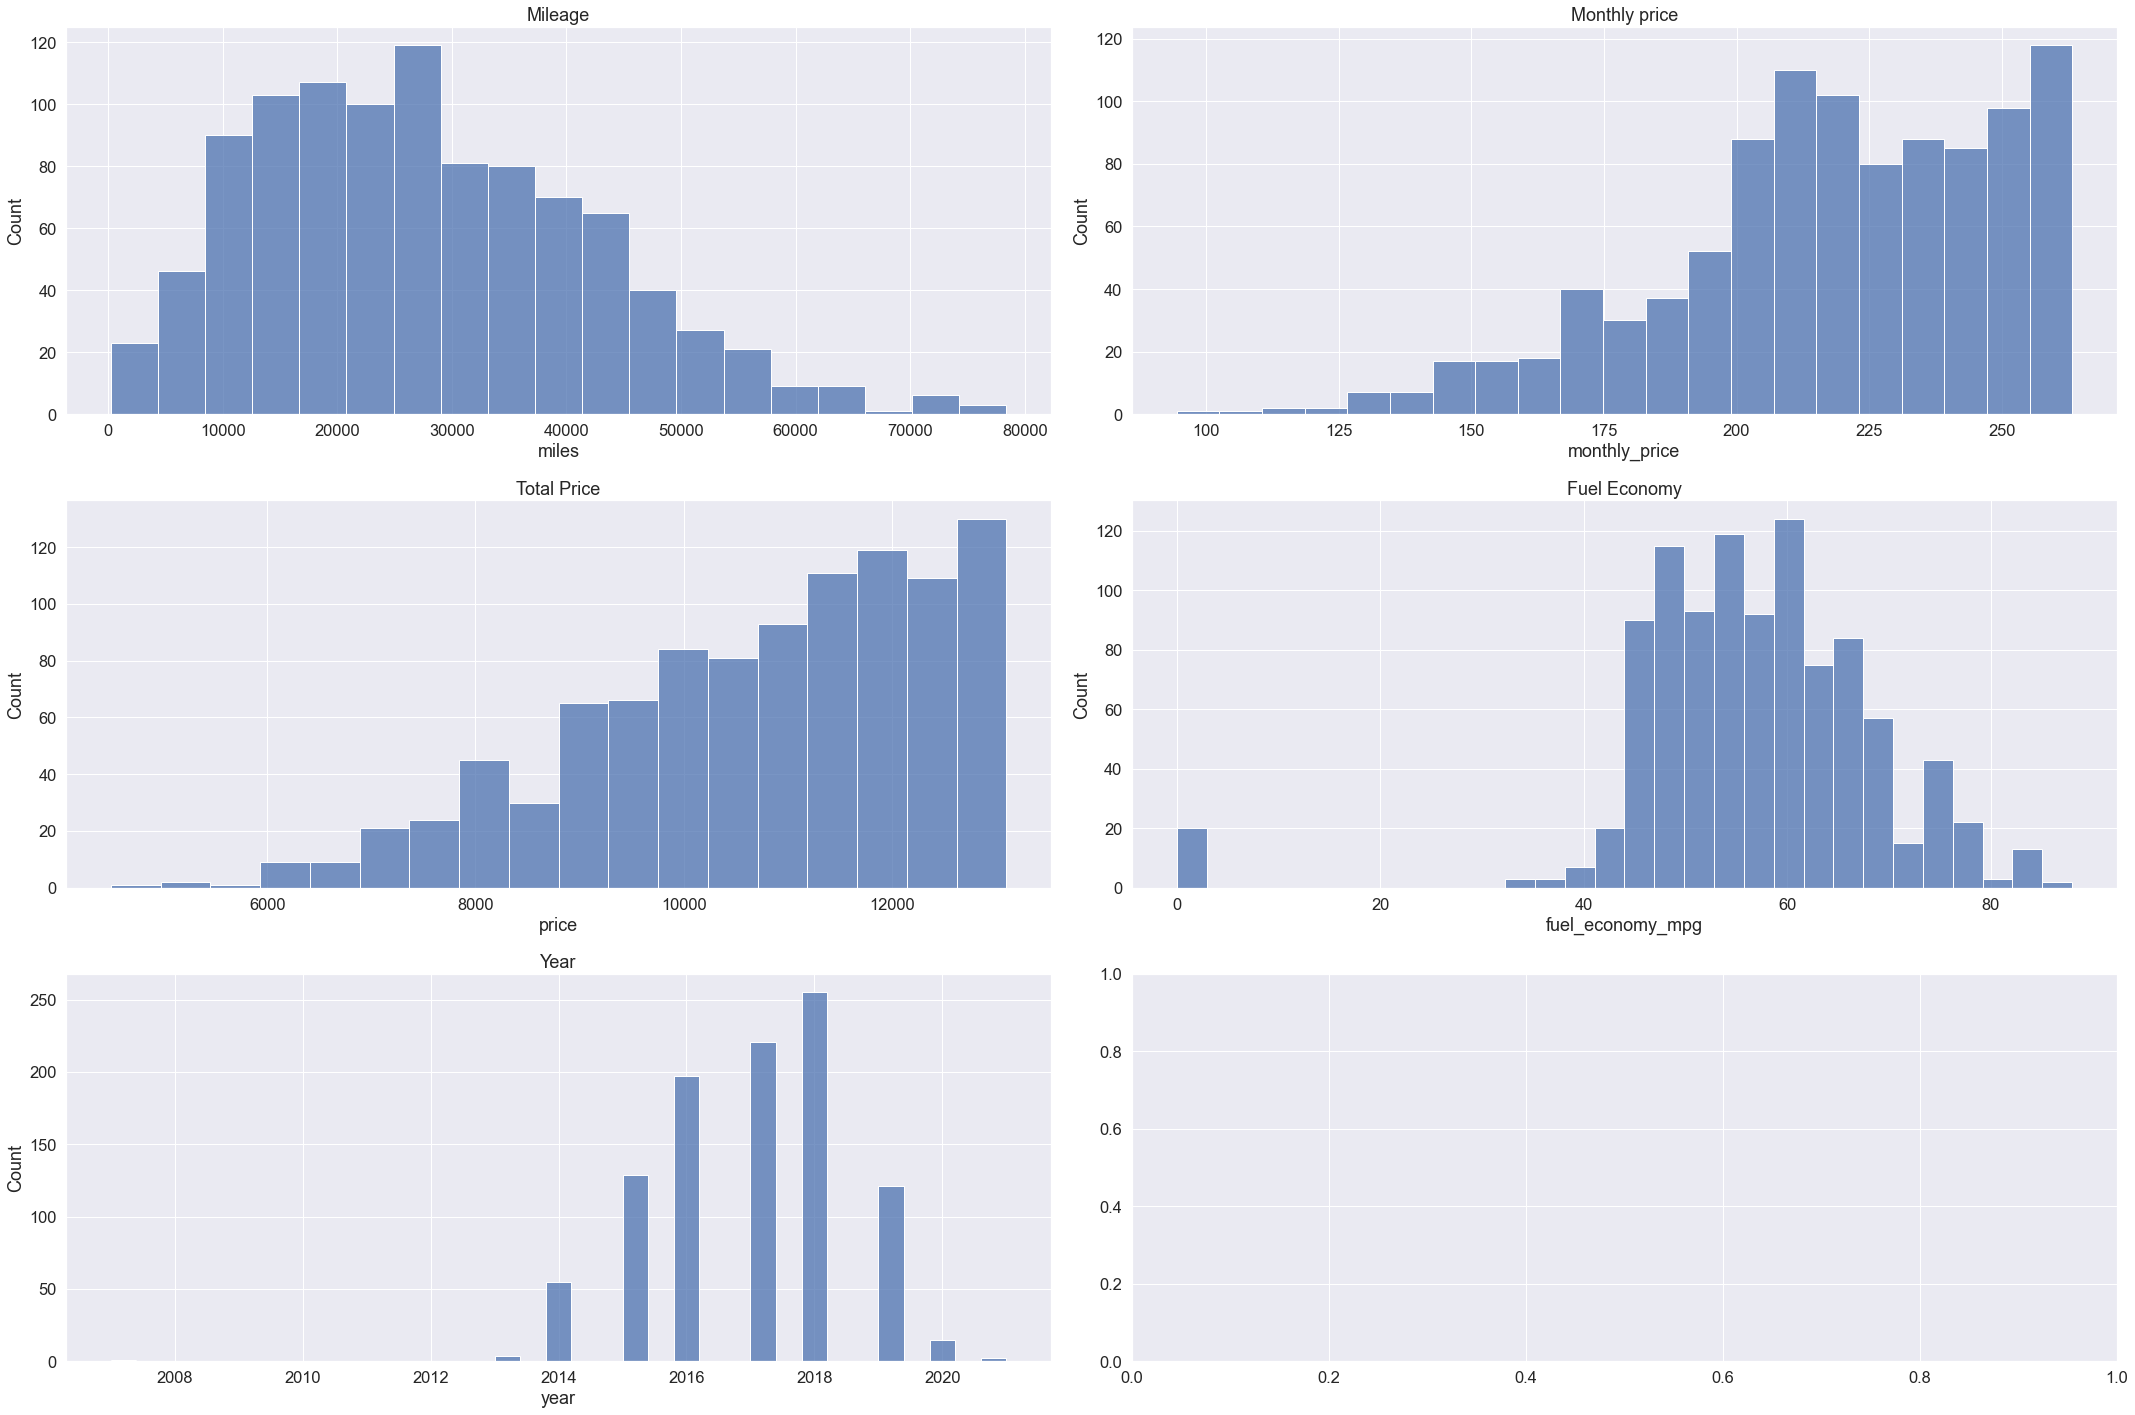

In [489]:
#histograms to gain a visual idea of the distribution of each variable

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(30,20))
axes[0,0].set_title('Mileage')
axes[0,1].set_title('Monthly price')
axes[1,0].set_title('Total Price')
axes[1,1].set_title('Fuel Economy')
axes[2,0].set_title('Year')


sn.histplot(df.miles,ax=axes[0,0])
sn.histplot(df.monthly_price,ax=axes[0,1]) 
sn.histplot(df.price,ax=axes[1,0])
sn.histplot(df.fuel_economy_mpg,ax=axes[1,1]) 
sn.histplot(df.year, ax =axes[2,0])


fig.tight_layout();

<AxesSubplot:title={'center':'Fuel Economy'}, xlabel='fuel_economy_mpg'>

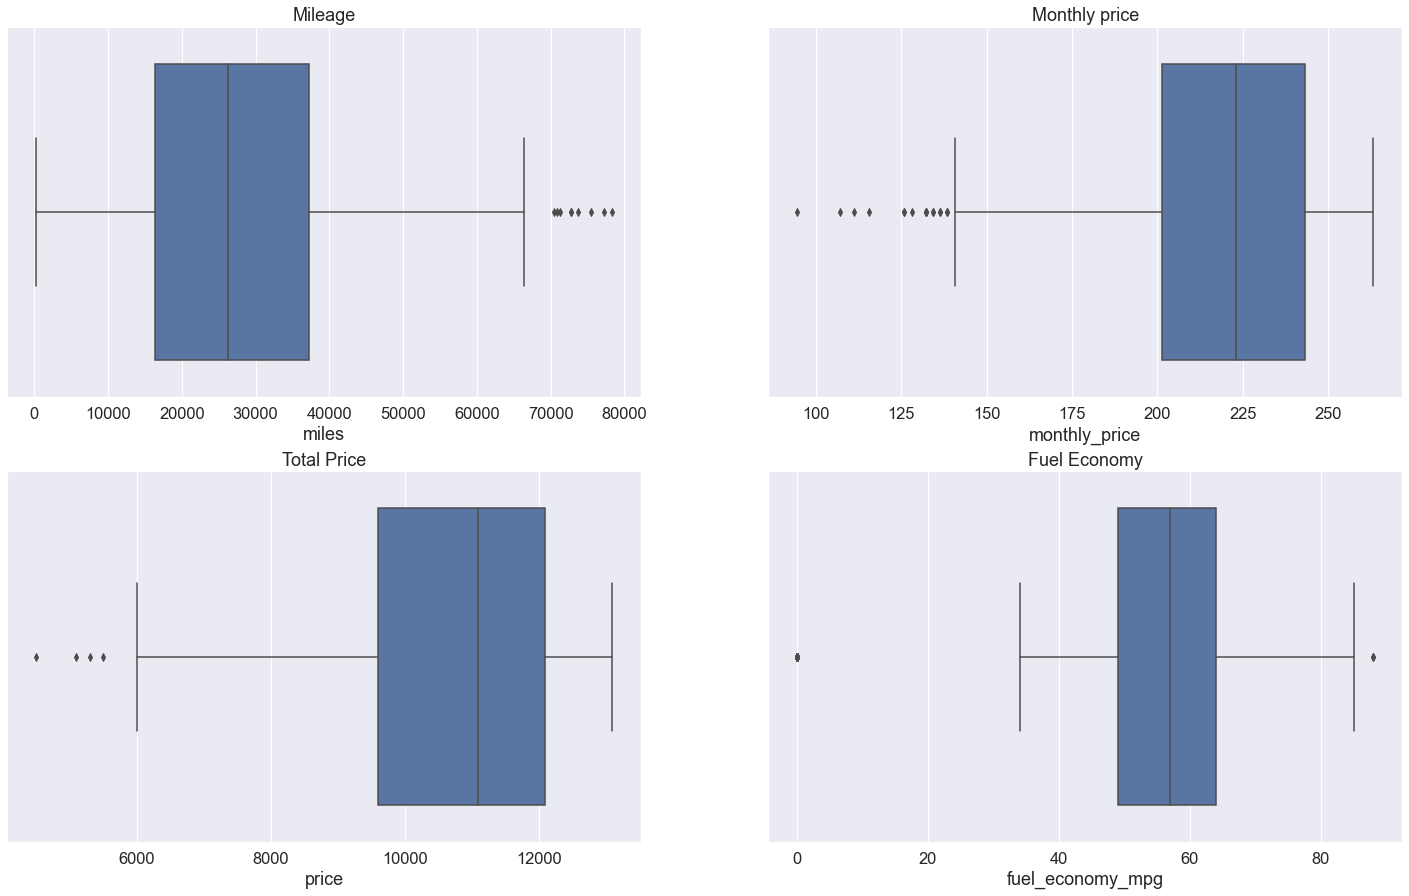

In [534]:
#boxplots to have a look at outliers
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(25,15))
axes[0,0].set_title('Mileage')
axes[0,1].set_title('Monthly price')
axes[1,0].set_title('Total Price')
axes[1,1].set_title('Fuel Economy')

sns.boxplot(x = df.miles,ax=axes[0,0])
sns.boxplot(x =df.monthly_price,ax=axes[0,1]) 
sns.boxplot(x = df.price,ax=axes[1,0])
sns.boxplot(x = df.fuel_economy_mpg,ax=axes[1,1]) 




<Figure size 1440x432 with 0 Axes>

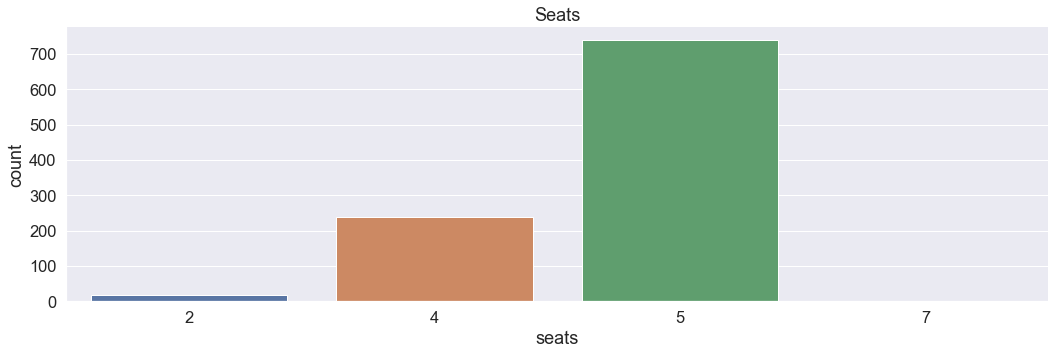

In [616]:
#vast majority of cars are 5 seaters
plt.figure(figsize=(20,6))
sns.catplot(x="seats", kind="count",  data=df, height=5, aspect=3)

plt.title("Seats");

<Figure size 1440x432 with 0 Axes>

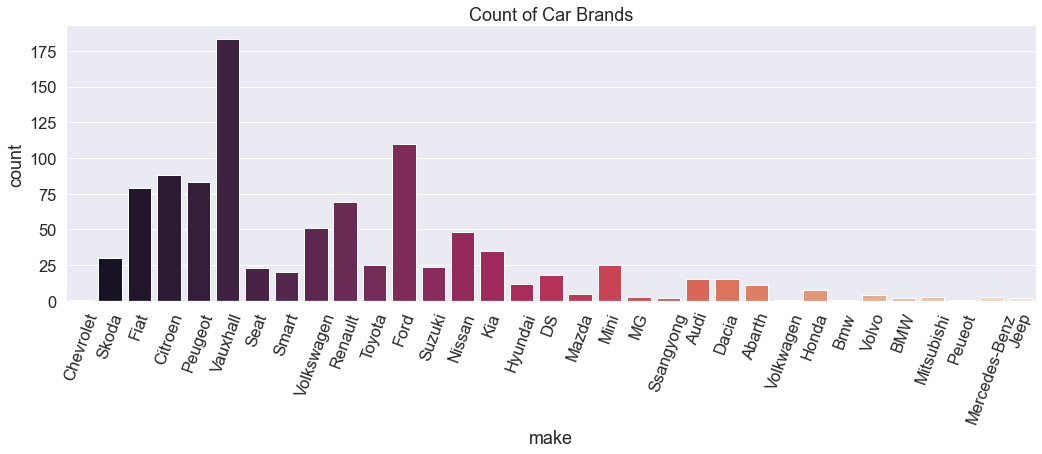

In [569]:
#how many of each car brand are in the dataset
plt.figure(figsize=(20,6))
sns.catplot(x="make", kind="count", palette="rocket", data=df, height=5, aspect=3)
plt.xticks(rotation=70);
plt.title("Count of Car Brands");

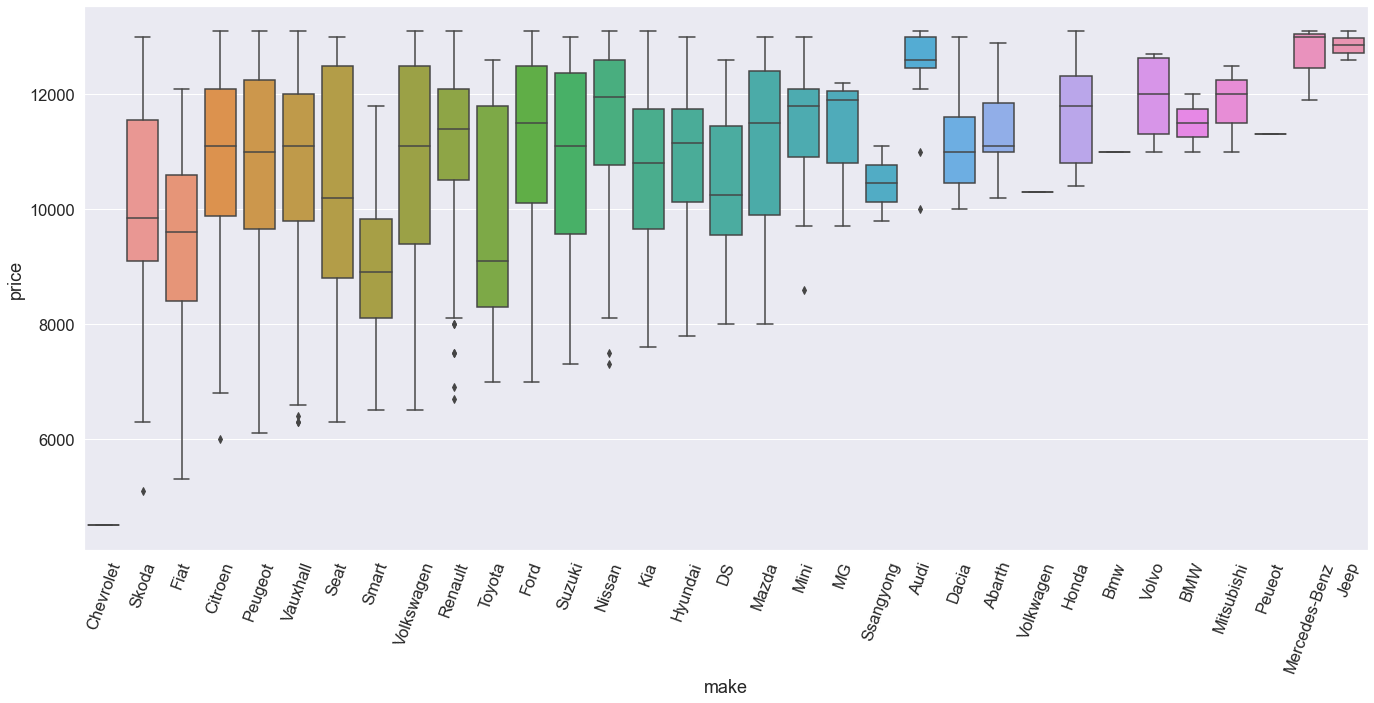

In [558]:
#distribution of price by make

plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)
plt.xticks(rotation=70);



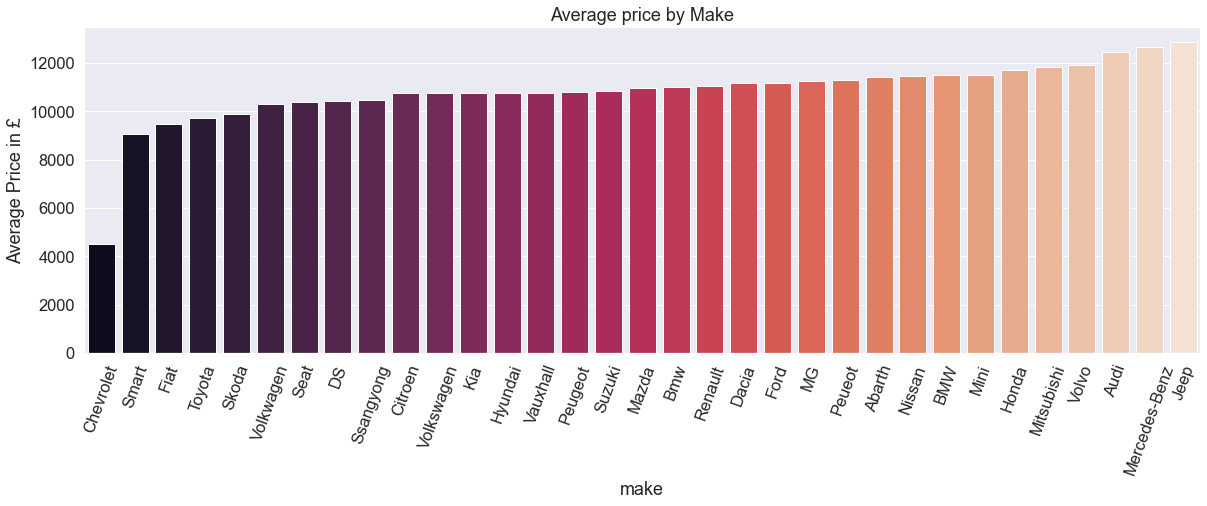

In [557]:
#average price by make, seems chevrolets are the cheapest, 
#but I think this may be due to low representation of Chervolets in the dataset
#while there are a lot of vaxhalls on the site, 
#but they seem to be more reasonably priced

sns.set(font_scale=1.5)
plt.figure(figsize=(20,6))
ax = sns.barplot(data=df,x='make',y='price',order = df.groupby(by = 'make')['price'].mean().sort_values( ascending=True).index ,
palette='rocket',ci=None);
ax.set(ylabel = 'Average Price in £')
plt.xticks(rotation=70);
plt.title("Average price by Make");


In [595]:
df.loc[df['make'].isin(['Chevrolet'])]
#as expected, only one moderatly priced Chevrolet in the dataset

,make,model,reg_number,location,miles,year,transmission,seats,fuel_type,fuel_economy_mpg,CO2_g/km,price,monthly_price,apr
0,Chevrolet,Spark 1.0 LS 5dr,BP63NXZ,Sutton in Ashfield,17824,2014,Manual,5,Petrol,55,119.0,4499.0,94.44,9.9


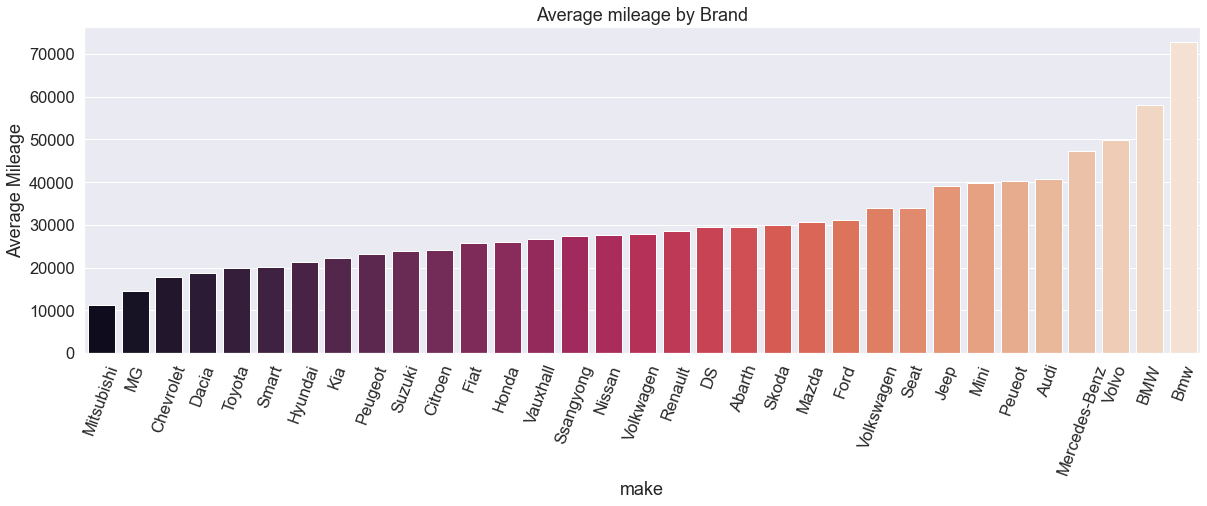

In [597]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,6))
ax = sns.barplot(data=df,x='make',y='miles',order = df.groupby(by = 'make')['miles'].mean().sort_values( ascending=True).index ,
palette='rocket',ci=None);
ax.set(ylabel = 'Average Mileage')
plt.xticks(rotation=70);
plt.title("Average mileage by Brand");

#BMWs are the most used cars 

<Figure size 1440x432 with 0 Axes>

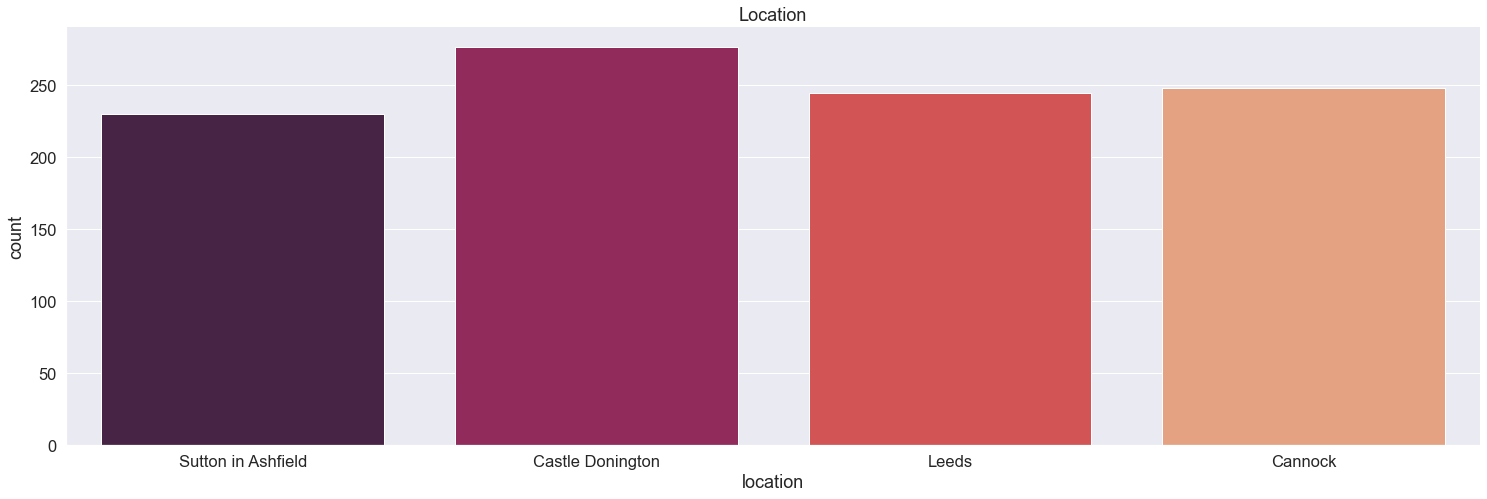

In [601]:
#Castle Donington is the place to go for second hand cars on this website!
plt.figure(figsize=(20,6))
sns.catplot(x="location", kind="count", palette="rocket", data=df, height=7, aspect=3)
plt.title("Location");

,miles,year,seats,fuel_economy_mpg,CO2_g/km,price,monthly_price,apr
miles,1.000000,-0.423676,0.184507,0.260468,0.000094,-0.084060,-0.082873,0.087163
year,-0.423676,1.000000,0.033340,-0.219254,0.060990,0.388243,0.387076,-0.340512
seats,0.184507,0.033340,1.000000,-0.071623,0.125960,0.389565,0.384414,-0.360367
fuel_economy_mpg,0.260468,-0.219254,-0.071623,1.000000,-0.219666,-0.168460,-0.165748,0.160046
CO2_g/km,0.000094,0.060990,0.125960,-0.219666,1.000000,0.098658,0.093954,-0.117330
price,-0.084060,0.388243,0.389565,-0.168460,0.098658,1.000000,0.997348,-0.835821
monthly_price,-0.082873,0.387076,0.384414,-0.165748,0.093954,0.997348,1.000000,-0.794301
apr,0.087163,-0.340512,-0.360367,0.160046,-0.117330,-0.835821,-0.794301,1.000000


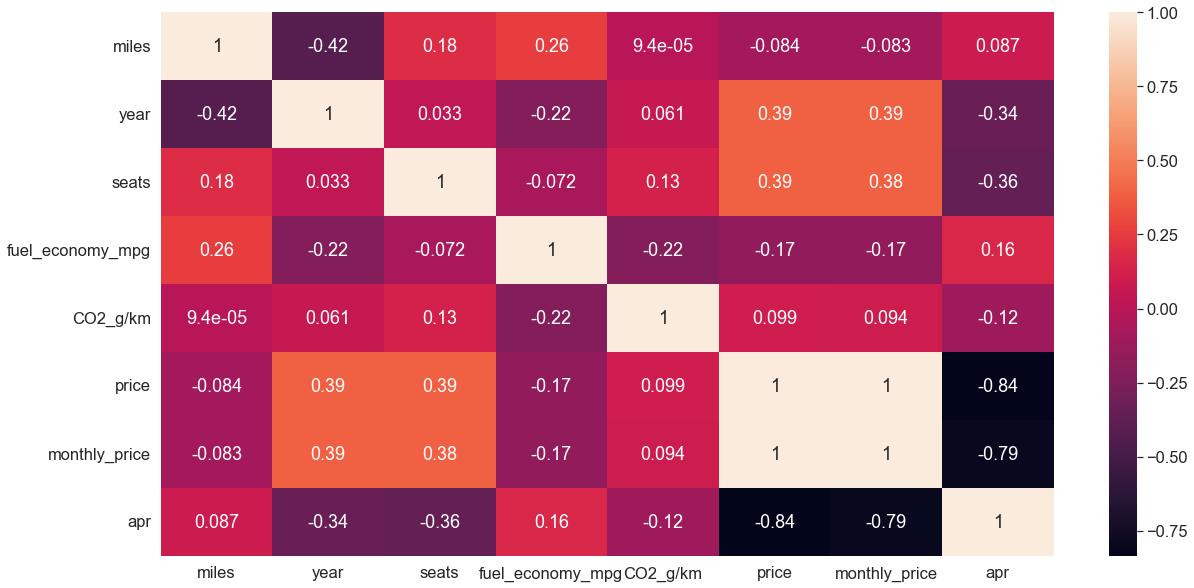

In [476]:
#corr plot to get an idea of correlation between each numeric variable
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="rocket",annot=True)
c

In [ ]:
#decided to look into the variables that effect price

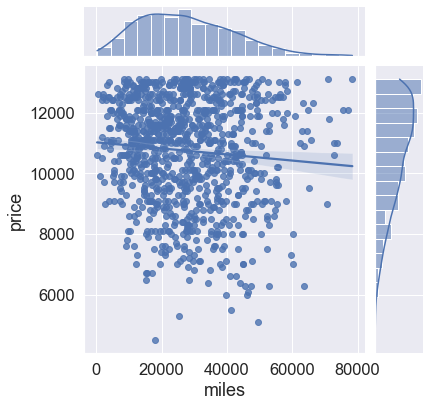

In [618]:
#mileage against price shows a slight negative correlation. 
#as expected as mileage goes up, price goes down

sns.jointplot(y = "price", x = "miles", data=df, kind='reg');
 


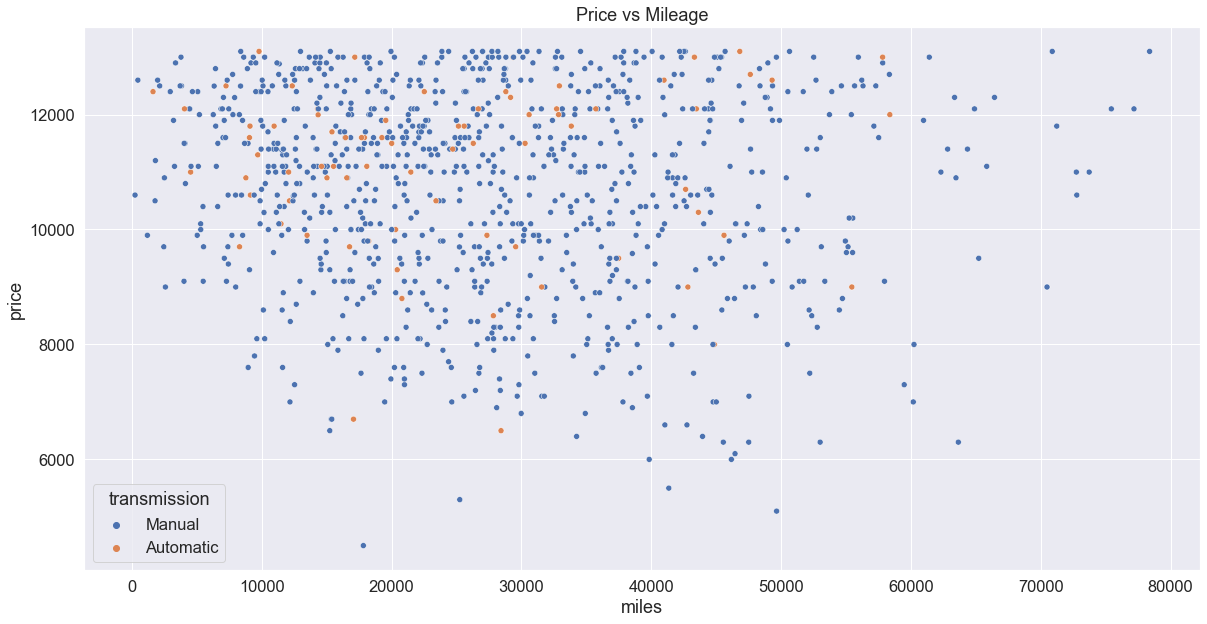

In [559]:
#same thing but bigger and with transmission type highlighted
plt.figure(figsize=(20,10))

sns.scatterplot(data = df, y = "price", x = "miles", hue = "transmission")
plt.title("Price vs Mileage");

<Figure size 1440x720 with 0 Axes>

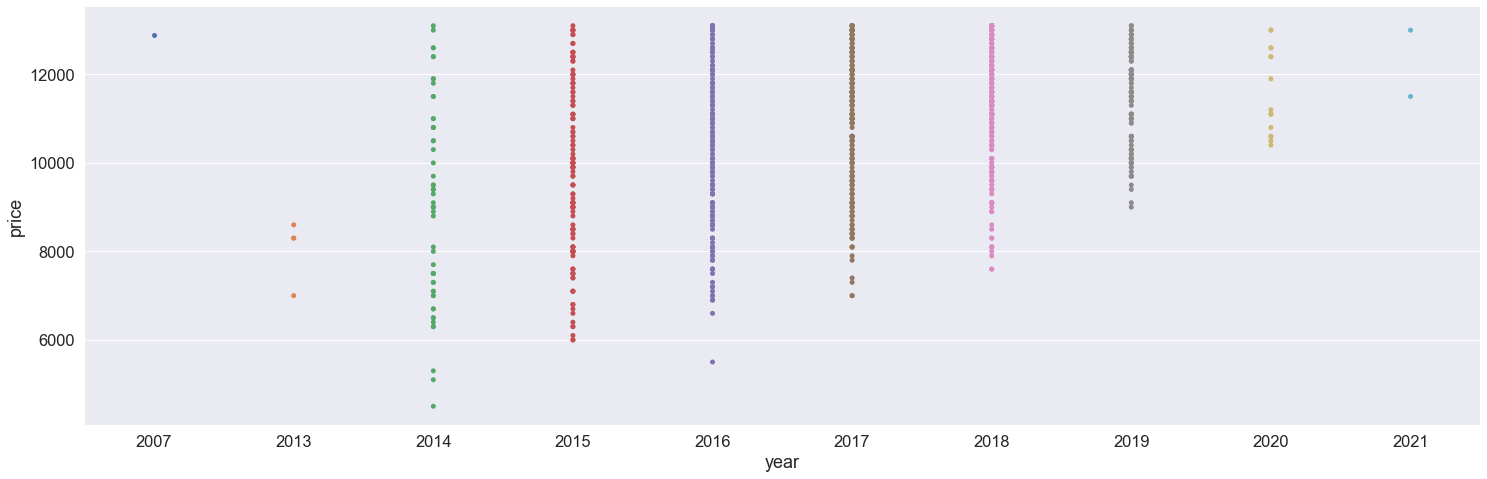

In [619]:
#investgating year vs price
plt.figure(figsize=(20,10))
sns.catplot(x="year", y="price", data=df, jitter=False,height=7, aspect=3)

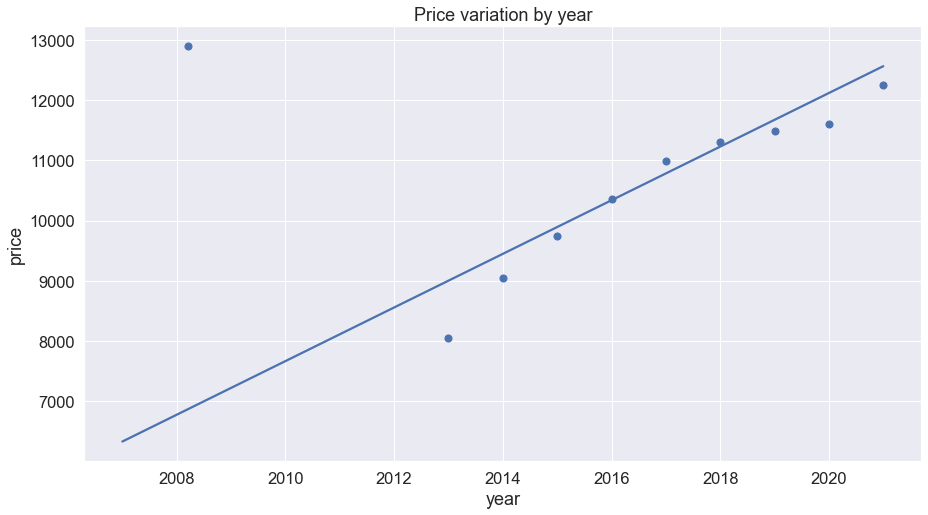

In [620]:
#price average by year, as expected the newer the car, the higher the value

plt.figure(figsize=[15,8])
sns.regplot(x=df['year'], y=df['price'], x_bins=5000, ci=None,)

plt.title("Price variation by year");



<AxesSubplot:xlabel='year', ylabel='price'>

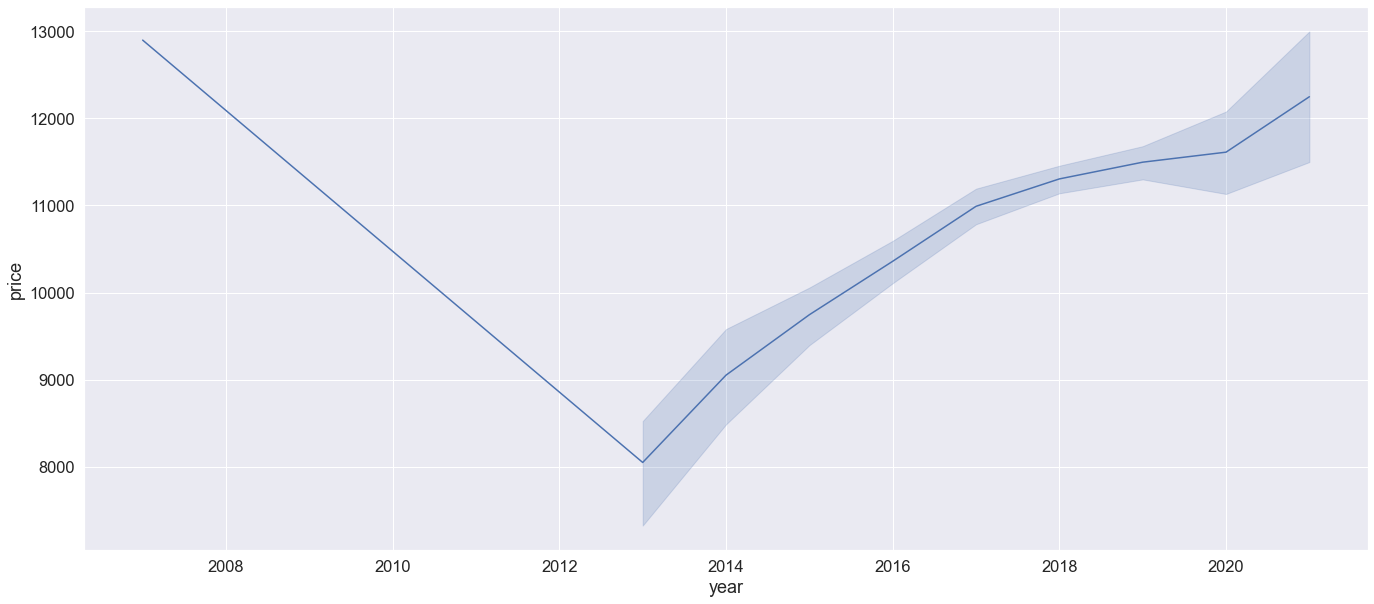

In [623]:
#weird outlier in 2008
#which natural renders awfully on a timeseries graph
sns.lineplot(data=df, x="year", y="price")

In [624]:
#2007 citroen is behind the outlier, dragged up by a few cars in 2013 
df.loc[df['year'].isin([2007, 2013])]

,make,model,reg_number,location,miles,year,transmission,seats,fuel_type,fuel_economy_mpg,CO2_g/km,price,monthly_price,apr
25,Ford,Fiesta 1.25 Zetec 3dr,BJ63PBZ,Cannock,44759,2013,Manual,5,Petrol,54,120.0,6999.0,146.91,9.9
107,Vauxhall,Mokka 1.4T Exclusiv 5dr 4WD,LG63PXK,Leeds,52780,2013,Manual,5,Petrol,44,149.0,8299.0,174.20,9.9
109,Ford,C-Max 1.6 TDCi Titanium 5dr,CN63RUH,Sutton in Ashfield,43395,2013,Manual,5,Diesel,62,117.0,8299.0,174.20,9.9
132,Mini,Cooper 1.6D Baker Street 3dr,GN63OXZ,Sutton in Ashfield,52155,2013,Manual,4,Diesel,74,99.0,8599.0,180.50,9.9
917,Citroen,C3 Aircross 1.2 PureTech 82 Feel 5dr,P444CHA,Castle Donington,9169,2007,Manual,5,Petrol,0,0.0,12899.0,259.25,7.9
